In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import g_key
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook
%matplotlib inline

# Tom's _ Part


In [2]:
# Tom's _ Part

file = '../res/thefile.csv'
df = pd.read_csv(file)
df.nunique()

Unnamed: 0            113351
country                   42
description           104625
points                    21
price                    378
region_1                1185
taster_name               20
title                 104310
variety                  675
winery                 15003
Lat                    12892
Lng                    12888
heat weights              21
year                      27
Climate Zone              23
Climate Zone Desc.        22
raiting                   21
dtype: int64

In [3]:
wineyards = df.groupby(['country'])
wineyards = wineyards['winery'].nunique()
wineyards = wineyards.sort_values(ascending=False).head(10)

In [4]:
wineyards.head()

country
US           5160
France       3087
Italy        2514
Spain        1304
Argentina     506
Name: winery, dtype: int64

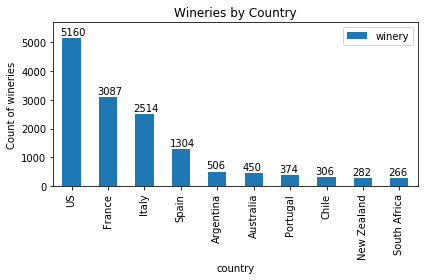

In [5]:
wineyards.plot(kind='bar')
plt.ylabel('Count of wineries')
plt.title("Wineries by Country")


for x in range(wineyards.shape[0]):
    
    plt.annotate(xy=(x-0.3, wineyards[x] + 100),
                s=wineyards[x])
plt.ylim(0,5700)    
plt.legend()
plt.tight_layout()

plt.savefig("../pics/winery_country.png");

In [6]:
cz = df.groupby(['Climate Zone'])

czc = cz['winery'].count().sort_values(ascending=False).head(10)
czc

Climate Zone
Csb    32462
Cfa    25686
Cfb    23136
Csa    12024
Dfb     6942
BSk     4142
Dfa     4078
BWk     1705
BSh      758
Dfc      584
Name: winery, dtype: int64

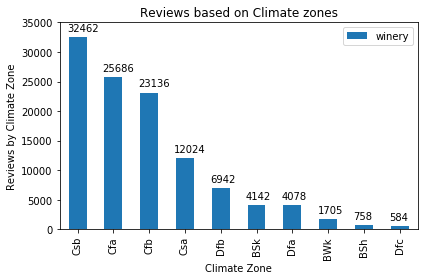

In [7]:
czc.plot(kind='bar')
plt.ylabel('Reviews by Climate Zone')
plt.title("Reviews based on Climate zones")


for x in range(czc.shape[0]):
    
    plt.annotate(xy=(x-0.3, czc[x] +1000),
                s=czc[x])
plt.ylim(0,35000)    
plt.legend()
plt.tight_layout()

plt.savefig("../pics/climatezone.png");

In [8]:
points = cz['points'].median()
price = cz['price'].median()
rating = cz['raiting'].median()

In [9]:
new = pd.DataFrame({'Price':price,'Score':points,'Rating':rating})

In [10]:
new

,Price,Score,Rating
Climate Zone,,,
Af,24.0,88.0,40.0
Am,25.0,88.0,40.0
As,28.0,88.0,40.0
Aw,25.0,88.0,40.0
BSh,25.0,88.0,40.0
BSk,25.0,88.0,40.0
BWh,24.0,88.0,40.0
BWk,24.0,88.0,40.0
Cfa,25.0,88.0,40.0


In [11]:
file = '../res/thefile.csv'
df = pd.read_csv(file)
df = df.loc[(df['Climate Zone'] == 'Csb') | 
           (df['Climate Zone'] == 'Cfa') |
           (df['Climate Zone'] == 'Cfb') |
           (df['Climate Zone'] == 'Csa') |
           (df['Climate Zone'] == 'Dfb') |
           (df['Climate Zone'] == 'BSk') |
           (df['Climate Zone'] == 'Dfa') |
           (df['Climate Zone'] == 'BWk') |
           (df['Climate Zone'] == 'BSh') |
           (df['Climate Zone'] == 'Dfc') ]


cz=df['Climate Zone']
price = df.price
points = df.points


In [12]:
def anova(x,y):
    anova_df = pd.DataFrame({'cz':x,'p':y})
    group1 = anova_df[anova_df["cz"] == 'Csb']["p"]
    group2 = anova_df[anova_df["cz"] == 'Cfa']["p"]
    group3 = anova_df[anova_df["cz"] == 'Cfb']["p"]
    group4 = anova_df[anova_df["cz"] == 'Csa']["p"]
    group5 = anova_df[anova_df["cz"] == 'Dfb']["p"]
    group6 = anova_df[anova_df["cz"] == 'BSk']["p"]
    group7 = anova_df[anova_df["cz"] == 'Dfa']["p"]
    group8 = anova_df[anova_df["cz"] == 'BWk']["p"]
    group9 = anova_df[anova_df["cz"] == 'BSh']["p"]
    group10 = anova_df[anova_df["cz"] == 'Dfc']["p"]
    return stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

In [13]:
def anovaplot(x,y):
    anova_df = pd.DataFrame({'cz':x,'p':y})
    anova_df.boxplot('p', by='cz',figsize=(20,10) )
    plt.suptitle("")
    
    #plt.legend()
    #plt.tight_layout()

In [14]:
anova(cz,price)

F_onewayResult(statistic=4.827274117585681, pvalue=1.7907644635220779e-06)

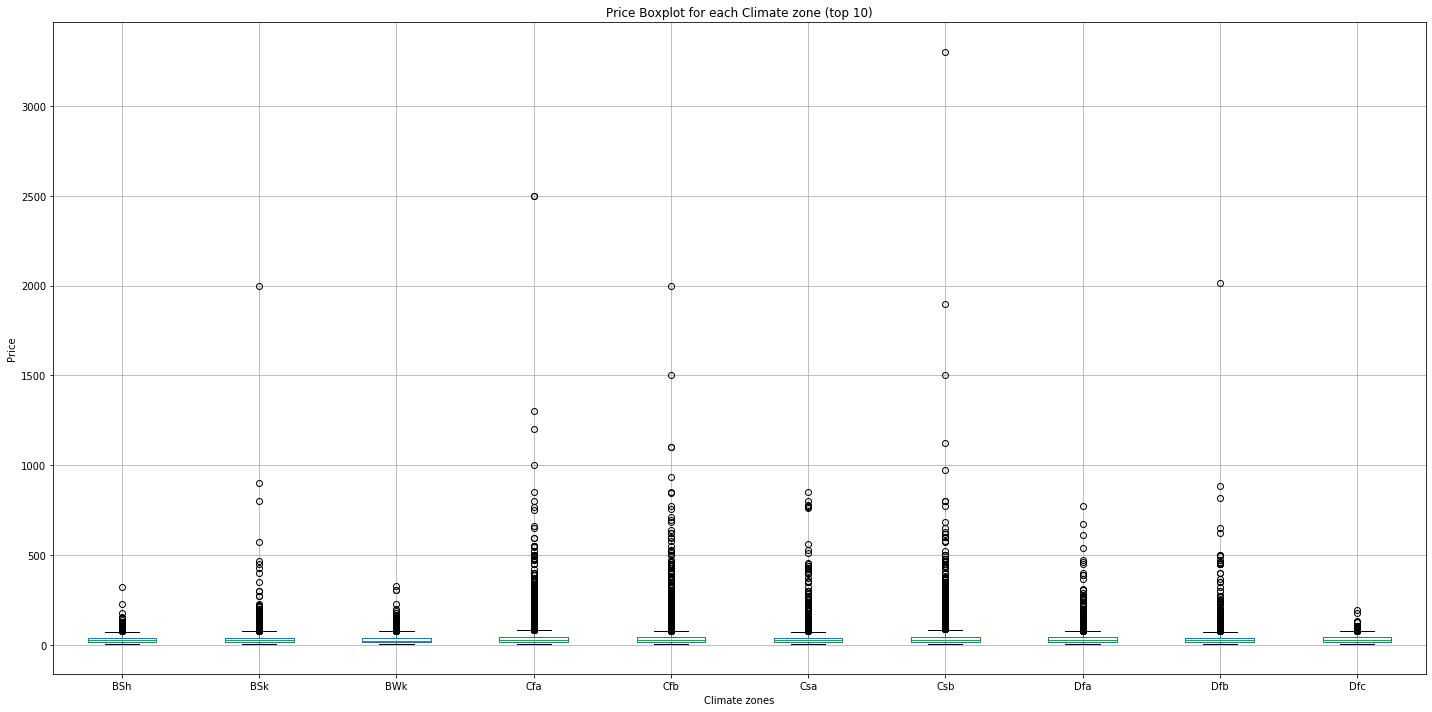

In [15]:
_=anovaplot(cz,price)
#plt.ylim(0,100)
_ =plt.ylabel('Price')
_=plt.xlabel('Climate zones')
_=plt.title('Price Boxplot for each Climate zone (top 10)')
_=plt.tight_layout()
plt.savefig('../pics/priceclimatelrg.png');

In [16]:
anova(cz,points)

F_onewayResult(statistic=14.39373088966597, pvalue=1.5224153910693889e-23)

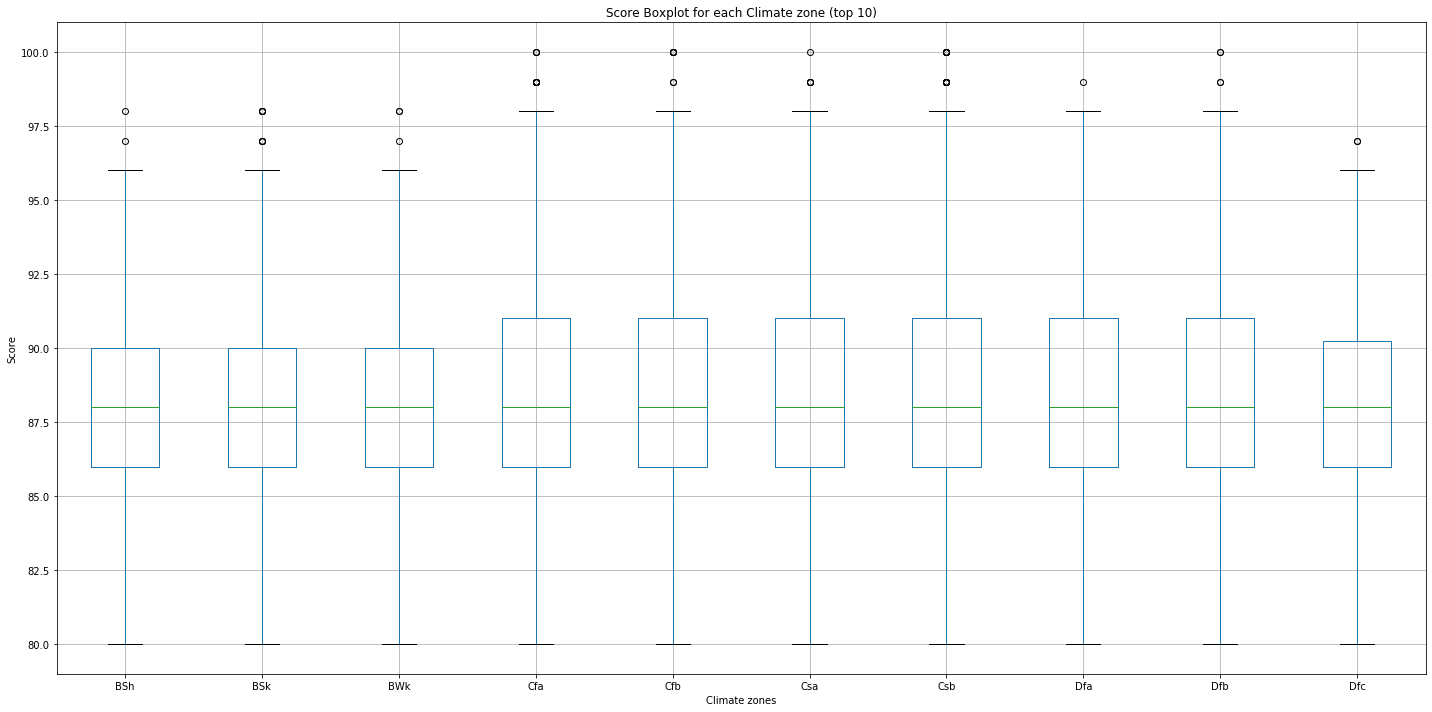

In [17]:
anovaplot(cz,points)
_ =plt.ylabel('Score')
_=plt.xlabel('Climate zones')
_=plt.title('Score Boxplot for each Climate zone (top 10)')
_=plt.tight_layout()
plt.savefig('../pics/scoreclimate.png');

In [18]:
df2 = pd.read_csv(file)


#df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)


df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cfa'),1,df2['Climate Zone'])
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Csb'),2,df2['Climate Zone'])
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Csa'),22,df2['Climate Zone'])
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cfb'),3,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dfb'),4,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dfa'),5,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BWk'),6,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BSk'),7,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BSh'),8,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'ET'),9,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dfc'),10,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Af'),11,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cwb'),12,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Aw'),13,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BWh'),14,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dsb'),15,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Am'),16,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cwa'),17,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'As'),18,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cwc'),19,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cfc'),20,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dsc'),21,df2['Climate Zone']) 
df2 = df2.loc[df2['Climate Zone']  != 'not avail']
df2

,Unnamed: 0,country,description,points,price,region_1,taster_name,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.,raiting
0,6760,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Vin Santo di Montepulciano,not avail,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,43.173566,11.933298,20,1995.0,2,"Mediterranean, warm summer",100
1,111871,France,"Full of ripe fruit, opulent and concentrated, ...",100,848.0,Pessac-Léognan,Roger Voss,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion,44.816652,-0.608612,20,2014.0,3,"Marine west coast, warm summer",100
2,32126,France,This is a fabulous wine from the greatest Cham...,100,259.0,Champagne,Roger Voss,Krug 2002 Brut (Champagne),Champagne Blend,Krug,38.518744,-122.480955,20,2002.0,3,"Marine west coast, warm summer",100
3,107357,US,This wine dazzles with perfection. Sourced fro...,100,450.0,Sonoma County,not avail,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité,42.372799,-72.498225,20,2007.0,4,"Humid continental, no dry season, warm summer",100
4,103526,US,In 2005 Charles Smith introduced three high-en...,100,80.0,Columbia Valley (WA),Paul Gregutt,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,33.965218,-80.350430,20,2006.0,1,"Humid subtropical, no dry season",100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113346,48578,Argentina,Raw cherry and plum aromas are resiny and sugg...,80,15.0,Agrelo,Michael Schachner,Lamadrid 2014 Single Vineyard Cabernet Sauvign...,Cabernet Sauvignon,Lamadrid,27.050596,-101.793233,0,2014.0,22,"Mediterranean, hot summer",0
113347,48577,Spain,Vague melon aromas are strange at best and off...,80,10.0,Cariñena,Michael Schachner,Bodegas San Valero 2014 Particular White (Cari...,White Blend,Bodegas San Valero,41.337046,-1.219061,0,2014.0,3,"Marine west coast, warm summer",0
113348,48576,Argentina,Stalky cranberry aromas are incomplete and pro...,80,20.0,Valle de Uco,Michael Schachner,Viñedos Altamira Valley 2011 VAV Malbec (Valle...,Malbec,Viñedos Altamira Valley,20.680793,-100.327033,0,2011.0,1,"Humid subtropical, no dry season",0
113349,48575,Spain,Dusty apple and papaya aromas lack fortitude. ...,80,7.0,La Mancha,Michael Schachner,Despierta 2014 Chardonnay (La Mancha),Chardonnay,Despierta,39.279561,-3.097702,0,2014.0,4,"Humid continental, no dry season, warm summer",0


In [19]:
lat = df2['Lat'].astype('int64')
points = df2['points'].astype('int64')
lng = df2['Lng'].astype('int64')
price = df2['price'].astype('int64')

In [20]:
def lireg(x,y):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_value = x*slope+intercept
    line_eq = 'y = ' +str(round(slope,2)) + ' x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_value,'r-')
    plt.annotate(r_value,(x.min()+1,y.min()+1),c='black',size=15)
    print(f'The r-scared is: {r_value}')

In [21]:
df2.head(1)

,Unnamed: 0,country,description,points,price,region_1,taster_name,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.,raiting
0,6760,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Vin Santo di Montepulciano,not avail,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,43.173566,11.933298,20,1995.0,2,"Mediterranean, warm summer",100


In [22]:
df_lat_less = df2.loc[df2["Lat"] < 0]
df_lat_more = df2.loc[df2["Lat"] > 0]

In [23]:
def lireg2(x,y):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_value = x*slope+intercept
    line_eq = 'y = ' +str(round(slope,2)) + ' x + ' + str(round(intercept,2))
    plt.plot(x,regress_value,'r-')
    plt.annotate(r_value,(x.min()+1,y.min()+1),c='black',size=15)
    print(f'The r-scared is: {r_value}')

The r-scared is: -0.09236161366128982
The r-scared is: 0.10854047676557858


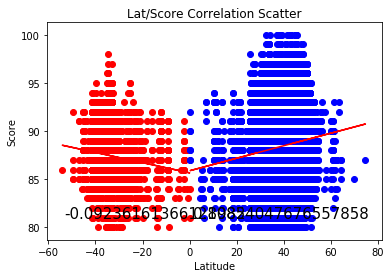

In [24]:
fig, ax1 = plt.subplots()

ax1.scatter(df_lat_less["Lat"], df_lat_less["points"],c="red")
ax1.scatter(df_lat_more["Lat"], df_lat_more["points"],c="blue")

lireg2(df_lat_less["Lat"], df_lat_less["points"])
lireg2(df_lat_more["Lat"], df_lat_more["points"])

_=plt.ylabel('Score')
_=plt.xlabel('Latitude')
_=plt.title('Lat/Score Correlation Scatter')

The r-scared is: 0.1042791306546638


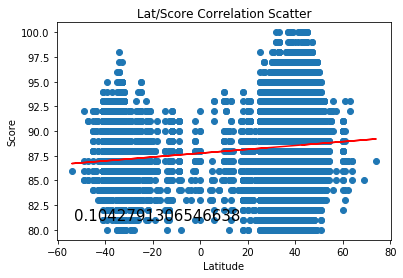

In [25]:
lireg(lat,points)
_ =plt.ylabel('Score')
_=plt.xlabel('Latitude')
_=plt.title('Lat/Score Correlation Scatter')


plt.savefig('../pics/latscore.png');


The r-scared is: 0.05215181382776535


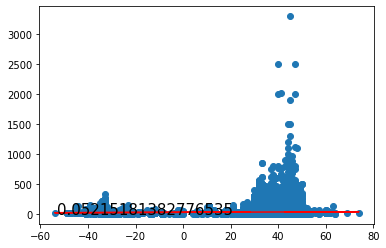

In [26]:
lireg(lat,price)

The r-scared is: -0.09535161063138015


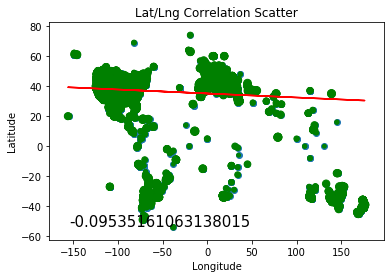

In [27]:

lireg(lng,lat)
plt.scatter(lng,lat,s=df2.raiting,c='green')
_ =plt.ylabel('Latitude')
_=plt.xlabel('Longitude')
_=plt.title('Lat/Lng Correlation Scatter')

plt.savefig('../pics/lnglat.png');

The r-scared is: 0.41451371528176134


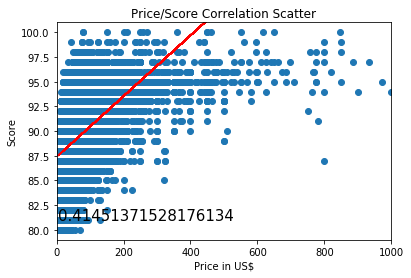

In [28]:
lireg(price,points)
year = df2['year'].astype('int64')
_=plt.ylim(79,101)
plt.xlim(0,1000)
_ =plt.ylabel('Score')
_=plt.xlabel('Price in US$')
_=plt.title('Price/Score Correlation Scatter')

plt.savefig('../pics/pricescore.png');

The r-scared is: 0.075607932815619


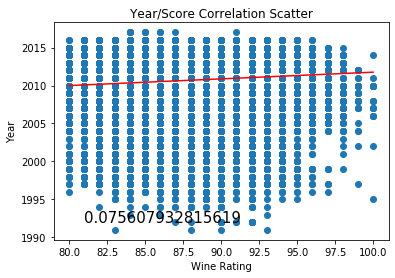

In [29]:
lireg(points,year)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Year')
_=plt.xlabel('Wine Rating')
_=plt.title('Year/Score Correlation Scatter')

plt.savefig('../pics/yearscore.png');

The r-scared is: -0.0754499749216256


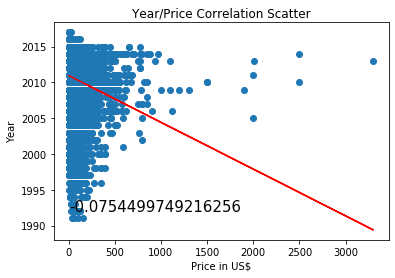

In [30]:
lireg(price,year)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Year')
_=plt.xlabel('Price in US$')
_=plt.title('Year/Price Correlation Scatter')

plt.savefig('../pics/yearprice.png');

The r-scared is: -0.011501184447464547


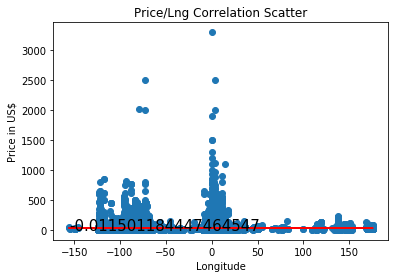

In [31]:
lireg(lng,price)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Price in US$')
_=plt.xlabel('Longitude')
_=plt.title('Price/Lng Correlation Scatter')

plt.savefig('../pics/pricelng.png');

The r-scared is: 0.011839556263727864


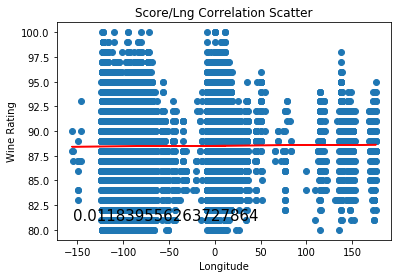

In [32]:
lireg(lng,points)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Wine Rating')
_=plt.xlabel('Longitude')
_=plt.title('Score/Lng Correlation Scatter')

plt.savefig('../pics/scorelng.png');

# Jordan's _ PART


In [33]:
file = '../res/thefile.csv'
df = pd.read_csv(file)
df_above = df.loc[df.price > 25,:]

In [34]:
df_above.head(1)

,Unnamed: 0,country,description,points,price,region_1,taster_name,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.,raiting
0,6760,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Vin Santo di Montepulciano,not avail,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,43.173566,11.933298,20,1995.0,Csb,"Mediterranean, warm summer",100


In [35]:
top_five = ["Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Red Blend", "Bordeaux-style Red Blend"]
var = df_above
#var = var.count().sort_values(by='price',ascending=False).head(5)
#var.mean().sort_values(by='price',ascending=False)
var = var.loc[(var["variety"] == top_five[0]) | (var["variety"] == top_five[1]) | (var["variety"] == top_five[2]) | (var["variety"] == top_five[3]) |(var["variety"] == top_five[4])]
var = var.groupby('variety')
var = var.median().sort_values(by='price',ascending=False)
var

,Unnamed: 0,points,price,Lat,Lng,heat weights,year,raiting
variety,,,,,,,,
Cabernet Sauvignon,59880.5,90.0,53.0,38.499155,-119.994849,10.0,2010.0,50.0
Bordeaux-style Red Blend,60168.0,90.0,49.0,44.732609,-76.744855,10.0,2011.0,50.0
Pinot Noir,59193.5,91.0,48.0,38.554521,-120.199923,11.0,2012.0,55.0
Red Blend,58036.0,90.0,42.0,40.986265,-73.940843,10.0,2010.0,50.0
Chardonnay,59141.0,90.0,40.0,38.528202,-97.333746,10.0,2012.0,50.0


In [36]:
len(var)

5

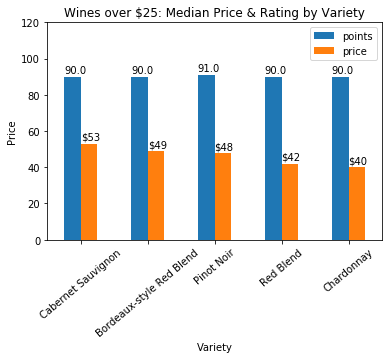

In [37]:
var = var.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year','raiting'])
var.plot(kind="bar", rot=40)
plt.ylabel("Price")
plt.title("Wines over $25: Median Price & Rating by Variety")

for x in range(len(var)):
    
    plt.annotate(xy=(x-0.25,var["points"][x]+2),
                s=var["points"][x])
    
    plt.annotate(xy=(x,var["price"][x]+2),
                s=var["price"].map('${:,.0f}'.format)[x])
plt.xlabel("Variety")
plt.ylim(0, 120)
plt.savefig('../pics/wine_over_25_variety.png')

In [38]:
country = df_above
top_five = ["US", "France", "Italy", "Spain", "Portugal"]
#var = var.count().sort_values(by='price',ascending=False).head(5)
#var.mean().sort_values(by='price',ascending=False)
country = country.loc[(country["country"] == top_five[0]) | (country["country"] == top_five[1]) | (country["country"] == top_five[2]) | (country["country"] == top_five[3]) |(country["country"] == top_five[4])]
country = country.groupby('country')
country = country.median().sort_values(by='price',ascending=False)
country

,Unnamed: 0,points,price,Lat,Lng,heat weights,year,raiting
country,,,,,,,,
Italy,58056,90,49.0,43.207809,10.602820,10,2010.0,50
France,57924,91,45.0,46.274888,3.800534,11,2012.0,55
US,59508,90,42.0,38.499155,-120.623595,10,2012.0,50
Spain,57539,90,41.0,41.533525,-3.684444,10,2009.0,50
Portugal,57920,92,40.0,39.595908,-8.487965,12,2011.0,60


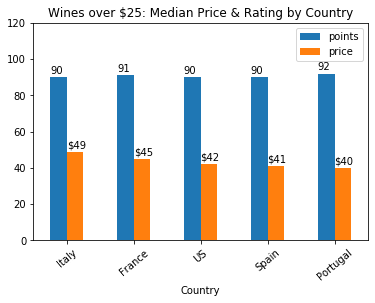

In [39]:
country = country.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year','raiting'])
country.plot(kind="bar", rot=40)
plt.title("Wines over $25: Median Price & Rating by Country")

for x in range(len(country)):
    
    plt.annotate(xy=(x-0.25,country["points"][x]+2),
                s=country["points"][x])
    
    plt.annotate(xy=(x,country["price"][x]+2),
                s=country["price"].map('${:,.0f}'.format)[x])
plt.xlabel("Country")
plt.ylim(0, 120)    
plt.savefig('../pics/wine_over_25_country.png')

In [40]:
df_below = df.loc[df.price < 25,:]

In [41]:
top_five = ["Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Red Blend", "Bordeaux-style Red Blend"]
var2 = df_below
#var = var.count().sort_values(by='price',ascending=False).head(5)
#var.mean().sort_values(by='price',ascending=False)
var2 = var2.loc[(var2["variety"] == top_five[0]) | (var2["variety"] == top_five[1]) | (var2["variety"] == top_five[2]) | (var2["variety"] == top_five[3]) |(var2["variety"] == top_five[4])]
var2 = var2.groupby('variety')
var2 = var2.median().sort_values(by='price',ascending=False)
var2 = var2.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year','raiting'])

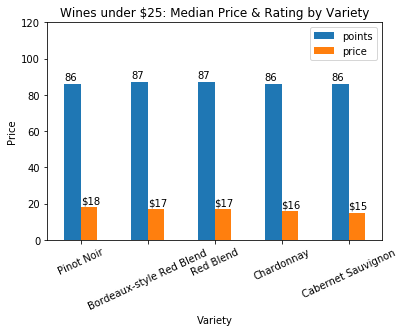

In [42]:
var2.plot(kind="bar", rot=25)
plt.ylabel("Price")
plt.title("Wines under $25: Median Price & Rating by Variety")

for x in range(len(var2)):
    
    plt.annotate(xy=(x-0.25,var2["points"][x]+2),
                s=var2["points"][x])
    
    plt.annotate(xy=(x,var2["price"][x]+2),
                s=var2["price"].map('${:,.0f}'.format)[x])
plt.xlabel("Variety")
plt.ylim(0, 120)   
plt.savefig('../pics/wine_under_25_variety.png')

In [43]:
country2 = df_below
top_five = ["US", "France", "Italy", "Spain", "Portugal"]
#var = var.count().sort_values(by='price',ascending=False).head(5)
#var.mean().sort_values(by='price',ascending=False)
country2 = country2.loc[(country2["country"] == top_five[0]) | (country2["country"] == top_five[1]) | (country2["country"] == top_five[2]) | (country2["country"] == top_five[3]) |(country2["country"] == top_five[4])]
country2 = country2.groupby('country')
country2  = country2.median().sort_values(by='price',ascending=False)
country2 = country2.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year','raiting'])


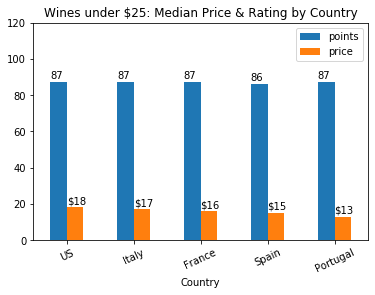

In [44]:
country2.plot(kind="bar", rot=25)
plt.title("Wines under $25: Median Price & Rating by Country")

for x in range(len(country2)):
    
    plt.annotate(xy=(x-0.25,country2["points"][x]+2),
                s=country2["points"][x])
    
    plt.annotate(xy=(x,country2["price"][x]+2),
                s=country2["price"].map('${:,.0f}'.format)[x])
plt.xlabel("Country")    
plt.ylim(0, 120)   
plt.savefig('../pics/wine_under_25_country.png')

In [45]:
df = df.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year', "description", "title", "taster_name" ])

The Pearson 'R' Correlation is: 0.41451428791505823


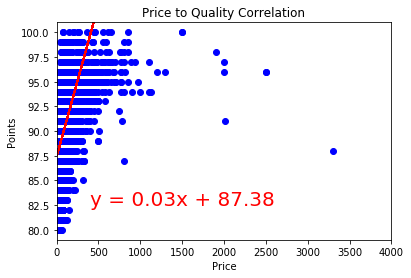

In [46]:
x_values = df["price"]
y_values = df["points"]


(slope, intercept, rvalue, pvvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(400, 82.5), fontsize=20, color="red")

plt.scatter(x_values, y_values, color='blue')

#labelling axis' and title
plt.xlabel("Price")
plt.ylabel("Points")
plt.title("Price to Quality Correlation")
plt.ylim(79, 101)
plt.xlim(0, 4000)
print("The Pearson 'R' Correlation is:",stats.pearsonr(x_values, y_values)[0])
plt.savefig("../pics/quality_price_correlation.png")
plt.show()

The Pearson 'R' Correlation is: 0.41451428791505823


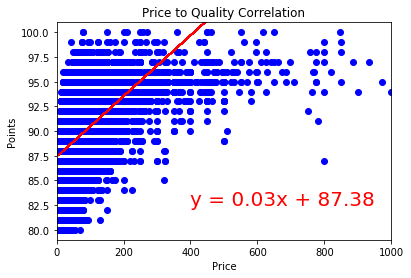

In [47]:
x_values = df["price"]
y_values = df["points"]


(slope, intercept, rvalue, pvvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(400, 82.5), fontsize=20, color="red")

plt.scatter(x_values, y_values, color='blue')

#labelling axis' and title
plt.xlabel("Price")
plt.ylabel("Points")
plt.title("Price to Quality Correlation")
plt.ylim(79, 101)
plt.xlim(0, 1000)
print("The Pearson 'R' Correlation is:",stats.pearsonr(x_values, y_values)[0])
plt.savefig("../pics/quality_price_correlation2.png")
plt.show()

In [48]:
reasonable_price_df_vgood = df.loc[(df["points"]==85) | (df["points"]==86) | (df["points"]==87) | (df["points"]==88) | (df["points"]==89)]
reasonable_price_df_vgood["price"].median()

20.0

In [49]:
reasonable_price_df_excellent = df.loc[(df["points"]==90) | (df["points"]==91) | (df["points"]==92) | (df["points"]==93) | (df["points"]==94)]
reasonable_price_df_excellent["price"].median()

40.0

In [50]:
df["custom rating"] = (df["points"]-80)*5

# Nabil's _ PART

In [51]:
weatherdf= "../res/thefile.csv"
weatherdf2 = pd.read_csv(weatherdf)

weatherdf2

,Unnamed: 0,country,description,points,price,region_1,taster_name,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.,raiting
0,6760,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Vin Santo di Montepulciano,not avail,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,43.173566,11.933298,20,1995.0,Csb,"Mediterranean, warm summer",100
1,111871,France,"Full of ripe fruit, opulent and concentrated, ...",100,848.0,Pessac-Léognan,Roger Voss,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion,44.816652,-0.608612,20,2014.0,Cfb,"Marine west coast, warm summer",100
2,32126,France,This is a fabulous wine from the greatest Cham...,100,259.0,Champagne,Roger Voss,Krug 2002 Brut (Champagne),Champagne Blend,Krug,38.518744,-122.480955,20,2002.0,Cfb,"Marine west coast, warm summer",100
3,107357,US,This wine dazzles with perfection. Sourced fro...,100,450.0,Sonoma County,not avail,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité,42.372799,-72.498225,20,2007.0,Dfb,"Humid continental, no dry season, warm summer",100
4,103526,US,In 2005 Charles Smith introduced three high-en...,100,80.0,Columbia Valley (WA),Paul Gregutt,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,33.965218,-80.350430,20,2006.0,Cfa,"Humid subtropical, no dry season",100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113346,48578,Argentina,Raw cherry and plum aromas are resiny and sugg...,80,15.0,Agrelo,Michael Schachner,Lamadrid 2014 Single Vineyard Cabernet Sauvign...,Cabernet Sauvignon,Lamadrid,27.050596,-101.793233,0,2014.0,Csa,"Mediterranean, hot summer",0
113347,48577,Spain,Vague melon aromas are strange at best and off...,80,10.0,Cariñena,Michael Schachner,Bodegas San Valero 2014 Particular White (Cari...,White Blend,Bodegas San Valero,41.337046,-1.219061,0,2014.0,Cfb,"Marine west coast, warm summer",0
113348,48576,Argentina,Stalky cranberry aromas are incomplete and pro...,80,20.0,Valle de Uco,Michael Schachner,Viñedos Altamira Valley 2011 VAV Malbec (Valle...,Malbec,Viñedos Altamira Valley,20.680793,-100.327033,0,2011.0,Cfa,"Humid subtropical, no dry season",0
113349,48575,Spain,Dusty apple and papaya aromas lack fortitude. ...,80,7.0,La Mancha,Michael Schachner,Despierta 2014 Chardonnay (La Mancha),Chardonnay,Despierta,39.279561,-3.097702,0,2014.0,Dfb,"Humid continental, no dry season, warm summer",0


In [52]:
#sort by variety 
x7= weatherdf2.groupby(['variety'])

#get number of reviews for each variety to determine popularity
x8= x7.count()

#sort by descending order, so most popular to least
x9=x8.sort_values(by='Unnamed: 0', ascending=False)


In [53]:
#take max and min of each variety in separate dataframes and then merge

x= weatherdf2.groupby(['variety'])
variety_min_price=x['price'].min()
variety_min_price

variety_max_price = x['price'].max()
variety_max_price

maxmin=pd.merge(variety_min_price,variety_max_price, how='inner', on='variety')
maxmin


,price_x,price_y
variety,,
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
Aglianico,6.0,180.0
Aidani,27.0,27.0
Airen,8.0,10.0
...,...,...
Zinfandel,6.0,100.0
Zlahtina,13.0,16.0
Zweigelt,9.0,70.0


In [54]:
#merge popularity and maxmin dataframe 

maxminvariety=pd.merge(x9,maxmin, how='inner', on='variety')
print(maxminvariety.columns.values)

['Unnamed: 0' 'country' 'description' 'points' 'price' 'region_1'
 'taster_name' 'title' 'winery' 'Lat' 'Lng' 'heat weights' 'year'
 'Climate Zone' 'Climate Zone Desc.' 'raiting' 'price_x' 'price_y']


In [55]:

#drop unneeded columns and rename
maxminvarietydrop=maxminvariety.drop([ "country", "description", 'points', 'price','region_1', 'taster_name',
                                      'title', 'winery','Lat', 'Lng' ,'heat weights' ,'year',
                                      'Climate Zone' ,'Climate Zone Desc.', 'raiting'], axis=1)
maxminvarietydropname=maxminvarietydrop.rename(columns = {'price_x':'Min Price', 'price_y':'Max Price', 'Unnamed: 0':'Number of Reviews'})
maxminvarietydropname.head(20)

,Number of Reviews,Min Price,Max Price
variety,,,
Pinot Noir,12396,7.0,2500.0
Chardonnay,10547,5.0,2013.0
Cabernet Sauvignon,9118,4.0,625.0
Red Blend,8025,6.0,500.0
Bordeaux-style Red Blend,5007,7.0,3300.0
Riesling,4869,5.0,775.0
Sauvignon Blanc,4612,5.0,135.0
Syrah,3996,4.0,750.0
Rosé,3051,5.0,800.0


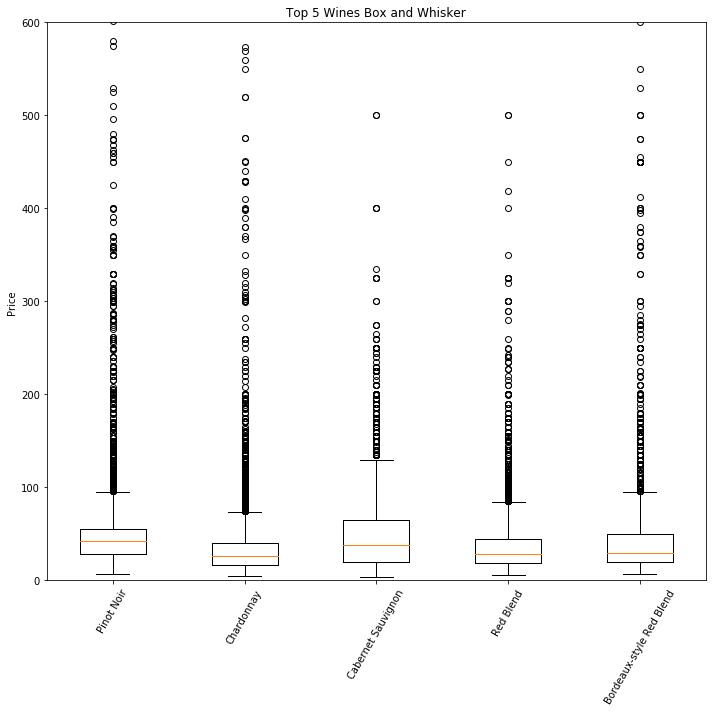

In [56]:
pinotnoir= weatherdf2.loc[weatherdf2['variety'] == 'Pinot Noir']
pinotvalues=pinotnoir['price']
chardonnay= weatherdf2.loc[weatherdf2['variety'] == 'Chardonnay']
chardvalues=chardonnay['price']
sauv= weatherdf2.loc[weatherdf2['variety'] == 'Cabernet Sauvignon']
sauvalues=sauv['price']
redblend= weatherdf2.loc[weatherdf2['variety'] == 'Red Blend']
redblendvalues= redblend['price']
bourdredblend= weatherdf2.loc[weatherdf2['variety'] == 'Bordeaux-style Red Blend']
bourdredblendvalues= bourdredblend['price']

fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.set_title('Top 5 Wines Box and Whisker')
ax1.set_ylabel('Price')
ax1.boxplot([pinotvalues, chardvalues,sauvalues, redblendvalues,bourdredblendvalues])
ax1.set_xticklabels(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend'], rotation=60)
plt.ylim(0,600)
plt.tight_layout()
plt.savefig('../pics/top5wines')
plt.show()

In [57]:
#sort by country 
x20= weatherdf2.groupby(['country'])

#get number of reviews for each country to determine popularity
x21= x20.count()

#sort by descending order, so most popular to least
x22=x21.sort_values(by='Unnamed: 0', ascending=False)
x22


,Unnamed: 0,description,points,price,region_1,taster_name,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.,raiting
country,,,,,,,,,,,,,,,,
US,52130,52130,52130,52130,52130,52130,52130,52130,52130,52130,52130,52130,52130,52130,52130,52130
Italy,15703,15703,15703,15703,15703,15703,15703,15703,15703,15703,15703,15703,15703,15703,15703,15703
France,15383,15383,15383,15383,15383,15383,15383,15383,15383,15383,15383,15383,15383,15383,15383,15383
Spain,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829
Portugal,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541
Chile,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298
Argentina,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555
Austria,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742
Australia,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180


In [58]:
#take max and min price of each country in separate dataframes and then merge

x23= weatherdf2.groupby(['country'])
country_min_price=x23['price'].min()
country_min_price

country_max_price = x23['price'].max()
country_max_price

maxmincountry=pd.merge(country_min_price,country_max_price, how='inner', on='country')
maxmincountry

,price_x,price_y
country,,
Argentina,4.0,230.0
Armenia,14.0,15.0
Australia,5.0,850.0
Austria,7.0,1100.0
Bosnia and Herzegovina,12.0,13.0
Brazil,10.0,60.0
Bulgaria,8.0,100.0
Canada,12.0,120.0
Chile,5.0,400.0


In [59]:
#merge popularity by country and maxmin dataframe 

maxmincountry2=pd.merge(x22,maxmincountry, how='inner', on='country')
print(maxmincountry2.columns.values)

['Unnamed: 0' 'description' 'points' 'price' 'region_1' 'taster_name'
 'title' 'variety' 'winery' 'Lat' 'Lng' 'heat weights' 'year'
 'Climate Zone' 'Climate Zone Desc.' 'raiting' 'price_x' 'price_y']


In [60]:

#drop unneeded columns and rename
maxmincountry2drop=maxmincountry2.drop([ "description",  'points', 'price',  'region_1',  'taster_name',  
                                        'title', 'winery','variety','Lat', 'Lng', 'heat weights' ,'year',
                                        'Climate Zone', 'Climate Zone Desc.' ,'raiting' ], axis=1)
maxmincountry2dropname=maxmincountry2drop.rename(columns = {'price_x':'Min Price', 'price_y':'Max Price', 'Unnamed: 0':'Number of Reviews'})
maxmincountry2dropname.head(20)

,Number of Reviews,Min Price,Max Price
country,,,
US,52130,4.0,2013.0
Italy,15703,5.0,900.0
France,15383,6.0,3300.0
Spain,5829,4.0,770.0
Portugal,4541,5.0,650.0
Chile,4298,5.0,400.0
Argentina,3555,4.0,230.0
Austria,2742,7.0,1100.0
Australia,2180,5.0,850.0


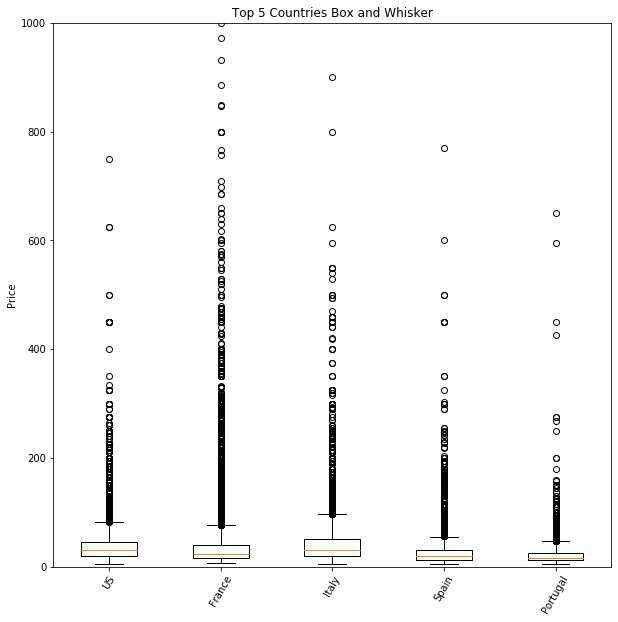

In [61]:
US= weatherdf2.loc[weatherdf2['country'] == 'US']
USvalues=US['price']
France= weatherdf2.loc[weatherdf2['country'] == 'France']
francevalues=France['price']
Italy= weatherdf2.loc[weatherdf2['country'] == 'Italy']
italyvalues=Italy['price']
Spain= weatherdf2.loc[weatherdf2['country'] == 'Spain']
spainvalues= Spain['price']
Portagul= weatherdf2.loc[weatherdf2['country'] == 'Portugal']
portagulvalues= Portagul['price']

#fig1, ax1 = plt.subplots()
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Top 5 Countries Box and Whisker')
ax1.set_ylabel('Price')
ax1.boxplot([USvalues, francevalues, italyvalues, spainvalues,portagulvalues])
ax1.set_xticklabels(['US', 'France', 'Italy', 'Spain', 'Portugal'], rotation=60)
plt.ylim(0,1000)
plt.savefig('../pics/top5countries')
plt.show()

In [62]:
countrydf = weatherdf2.groupby(['country','variety'])

#get number of reviews for each variety to determine popularity
countrydf2 = countrydf.count()

#sort by descending order, so most popular to least
countrydf3= countrydf2.sort_values(by='Unnamed: 0', ascending=False)
countrydf3.head(20)
print(countrydf3.columns.values)



['Unnamed: 0' 'description' 'points' 'price' 'region_1' 'taster_name'
 'title' 'winery' 'Lat' 'Lng' 'heat weights' 'year' 'Climate Zone'
 'Climate Zone Desc.' 'raiting']


In [63]:
countrydf4=countrydf3.drop([ "description",  'points', 'price',  'region_1',  'taster_name',  
                            'title', 'winery','Lat' ,'Lng' ,'heat weights', 'year' ,'Climate Zone',
                            'Climate Zone Desc.', 'raiting'], axis=1)
countrydf4
#countryvarietymaxmin=pd.merge(countrydf4,maxmin, how='inner', on='variety')
#countryvarietymaxmin.head(20)

Unnamed: 0
country variety                              
US      Pinot Noir                       9650
        Cabernet Sauvignon               7086
        Chardonnay                       6590
Italy   Red Blend                        3176
US      Syrah                            3164
...                                       ...
Mexico  Cabernet Blend                      1
        Cabernet Franc                      1
        Cabernet Sauvignon-Merlot           1
        Cinsault                            1
Uruguay White Blend                         1

[1531 rows x 1 columns]

# Ashvin's _ PART

In [64]:
# Import our data into pandas from CSV
wine_data = "../res/winedata_2016.csv"
wine_data_df = pd.read_csv(wine_data,index_col=False)

exports = wine_data_df.loc[wine_data_df['Series']== 'Wine exports',:]
#exports.head()
wine_data_df

,Continent,Country,Series,Year,Unit,Value
0,Asia,Afghanistan,Wine imports,2016.0,1000 hl,1.0
1,Asia,Afghanistan,Wine consumption,2016.0,1000 hl,1.0
2,Asia,Afghanistan,Consumption of wine per capita (+15),2016.0,l/capita (+15),0.0
3,Europe,Albania,Wine production,2016.0,1000 hl,178.0
4,Europe,Albania,Wine exports,2016.0,1000 hl,0.0
...,...,...,...,...,...,...
769,Africa,Zimbabwe,Wine production,2016.0,1000 hl,25.0
770,Africa,Zimbabwe,Wine exports,2016.0,1000 hl,0.0
771,Africa,Zimbabwe,Wine imports,2016.0,1000 hl,17.0
772,Africa,Zimbabwe,Wine consumption,2016.0,1000 hl,41.0


In [65]:
exp_val = exports.sort_values(by='Value', ascending=False).head(20)
exp_val


,Continent,Country,Series,Year,Unit,Value
639,Europe,Spain,Wine exports,2016.0,1000 hl,22626.0
337,Europe,Italy,Wine exports,2016.0,1000 hl,20636.0
233,Europe,France,Wine exports,2016.0,1000 hl,14072.0
137,America,Chile,Wine exports,2016.0,1000 hl,9076.0
34,Oceania,Australia,Wine exports,2016.0,1000 hl,7280.0
634,Africa,South Africa,Wine exports,2016.0,1000 hl,4283.0
738,America,United States,Wine exports,2016.0,1000 hl,3790.0
255,Europe,Germany,Wine exports,2016.0,1000 hl,3609.0
548,Europe,Portugal,Wine exports,2016.0,1000 hl,2778.0
24,America,Argentina,Wine exports,2016.0,1000 hl,2598.0


In [66]:
exp_val1 = pd.DataFrame({'Çountry':exp_val["Country"],'Éxport Amount':exp_val["Value"]}).head(20)
exp_val = exp_val1.set_index('Çountry')


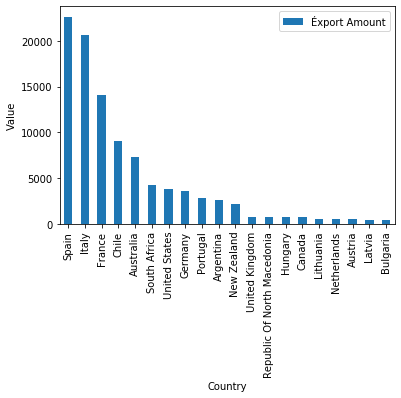

<Figure size 432x288 with 0 Axes>

In [80]:
count_chart = exp_val.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Value")


plt.show()
plt.tight_layout()
plt.savefig('../pics/Export.png')

In [68]:
#Which country consumes the most of their countries production (as a percent)?
#(Production + imports) – exports = wine left in the country for consumption
wine_data_df

,Continent,Country,Series,Year,Unit,Value
0,Asia,Afghanistan,Wine imports,2016.0,1000 hl,1.0
1,Asia,Afghanistan,Wine consumption,2016.0,1000 hl,1.0
2,Asia,Afghanistan,Consumption of wine per capita (+15),2016.0,l/capita (+15),0.0
3,Europe,Albania,Wine production,2016.0,1000 hl,178.0
4,Europe,Albania,Wine exports,2016.0,1000 hl,0.0
...,...,...,...,...,...,...
769,Africa,Zimbabwe,Wine production,2016.0,1000 hl,25.0
770,Africa,Zimbabwe,Wine exports,2016.0,1000 hl,0.0
771,Africa,Zimbabwe,Wine imports,2016.0,1000 hl,17.0
772,Africa,Zimbabwe,Wine consumption,2016.0,1000 hl,41.0


In [69]:
#prod_val = Wine production by counteries
prod_val = wine_data_df.loc[wine_data_df['Series']== 'Wine production',:]
prod_val

prod_val = prod_val.sort_values(by='Value', ascending=False).head(20)
prod_val


,Continent,Country,Series,Year,Unit,Value
336,Europe,Italy,Wine production,2016.0,1000 hl,50920.0
232,Europe,France,Wine production,2016.0,1000 hl,45367.0
638,Europe,Spain,Wine production,2016.0,1000 hl,39670.0
737,America,United States,Wine production,2016.0,1000 hl,23715.0
141,Asia,China,Wine production,2016.0,1000 hl,13217.0
33,Oceania,Australia,Wine production,2016.0,1000 hl,13100.0
633,Africa,South Africa,Wine production,2016.0,1000 hl,10531.0
136,America,Chile,Wine production,2016.0,1000 hl,10143.0
23,America,Argentina,Wine production,2016.0,1000 hl,9447.0
254,Europe,Germany,Wine production,2016.0,1000 hl,9013.0


In [70]:
#prod_val[["Country", "Value"]].head(20)
prod_val1 = pd.DataFrame({'Country':prod_val["Country"],'Production Amount':prod_val["Value"]}).head(20)
prod_val = prod_val1.set_index('Country')

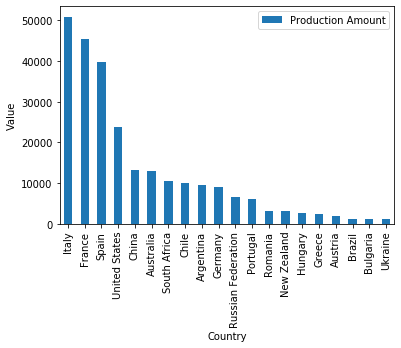

<Figure size 432x288 with 0 Axes>

In [71]:
count_chart = prod_val.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Value")


plt.show()
plt.tight_layout()
plt.savefig('../pics/Production.png')

In [72]:
wine_data_df

,Continent,Country,Series,Year,Unit,Value
0,Asia,Afghanistan,Wine imports,2016.0,1000 hl,1.0
1,Asia,Afghanistan,Wine consumption,2016.0,1000 hl,1.0
2,Asia,Afghanistan,Consumption of wine per capita (+15),2016.0,l/capita (+15),0.0
3,Europe,Albania,Wine production,2016.0,1000 hl,178.0
4,Europe,Albania,Wine exports,2016.0,1000 hl,0.0
...,...,...,...,...,...,...
769,Africa,Zimbabwe,Wine production,2016.0,1000 hl,25.0
770,Africa,Zimbabwe,Wine exports,2016.0,1000 hl,0.0
771,Africa,Zimbabwe,Wine imports,2016.0,1000 hl,17.0
772,Africa,Zimbabwe,Wine consumption,2016.0,1000 hl,41.0


In [73]:
#prod_val = Wine production by counteries
imp_val = wine_data_df.loc[wine_data_df['Series']== 'Wine imports',:]
imp_val

imp_val = imp_val.sort_values(by='Value', ascending=False).head(20)
imp_val

,Continent,Country,Series,Year,Unit,Value
256,Europe,Germany,Wine imports,2016.0,1000 hl,14851.0
734,Europe,United Kingdom,Wine imports,2016.0,1000 hl,13555.0
739,America,United States,Wine imports,2016.0,1000 hl,11143.0
234,Europe,France,Wine imports,2016.0,1000 hl,7750.0
143,Asia,China,Wine imports,2016.0,1000 hl,6389.0
489,Europe,Netherlands,Wine imports,2016.0,1000 hl,4478.0
125,America,Canada,Wine imports,2016.0,1000 hl,4157.0
567,Europe,Russian Federation,Wine imports,2016.0,1000 hl,4040.0
68,Europe,Belgium,Wine imports,2016.0,1000 hl,3120.0
348,Asia,Japan,Wine imports,2016.0,1000 hl,2686.0


In [74]:
#imp_val[["Country", "Value"]].head(20)
#prod_val[["Country", "Value"]].head(20)
imp_val1 = pd.DataFrame({'Country':imp_val["Country"],'Import Amount':imp_val["Value"]}).head(20)
imp_val = imp_val1.set_index('Country')

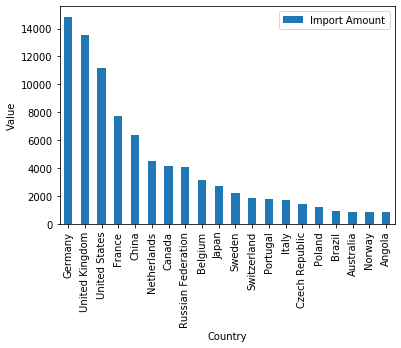

<Figure size 432x288 with 0 Axes>

In [75]:
count_chart = imp_val.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Value")


plt.show()
plt.tight_layout()
plt.savefig('../res/Import.png')

In [76]:
wine_data_df

,Continent,Country,Series,Year,Unit,Value
0,Asia,Afghanistan,Wine imports,2016.0,1000 hl,1.0
1,Asia,Afghanistan,Wine consumption,2016.0,1000 hl,1.0
2,Asia,Afghanistan,Consumption of wine per capita (+15),2016.0,l/capita (+15),0.0
3,Europe,Albania,Wine production,2016.0,1000 hl,178.0
4,Europe,Albania,Wine exports,2016.0,1000 hl,0.0
...,...,...,...,...,...,...
769,Africa,Zimbabwe,Wine production,2016.0,1000 hl,25.0
770,Africa,Zimbabwe,Wine exports,2016.0,1000 hl,0.0
771,Africa,Zimbabwe,Wine imports,2016.0,1000 hl,17.0
772,Africa,Zimbabwe,Wine consumption,2016.0,1000 hl,41.0


In [77]:
cons_val = wine_data_df.loc[wine_data_df['Series']== 'Wine consumption',:]
cons_val

cons_val = cons_val.sort_values(by='Value', ascending=False).head(20)
cons_val

,Continent,Country,Series,Year,Unit,Value
740,America,United States,Wine consumption,2016.0,1000 hl,31684.0
235,Europe,France,Wine consumption,2016.0,1000 hl,27114.0
339,Europe,Italy,Wine consumption,2016.0,1000 hl,22400.0
257,Europe,Germany,Wine consumption,2016.0,1000 hl,20200.0
144,Asia,China,Wine consumption,2016.0,1000 hl,19162.0
735,Europe,United Kingdom,Wine consumption,2016.0,1000 hl,12919.0
568,Europe,Russian Federation,Wine consumption,2016.0,1000 hl,10457.0
641,Europe,Spain,Wine consumption,2016.0,1000 hl,9850.0
26,America,Argentina,Wine consumption,2016.0,1000 hl,9416.0
36,Oceania,Australia,Wine consumption,2016.0,1000 hl,5380.0


In [78]:
cons_val1 = pd.DataFrame({'Çountry':cons_val["Country"],'consumption Amount':cons_val["Value"]}).head(20)
cons_val = cons_val1.set_index('Çountry')

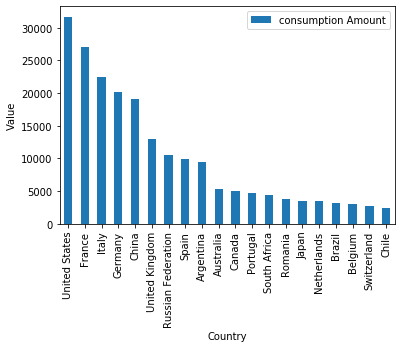

<Figure size 432x288 with 0 Axes>

In [81]:
count_chart = cons_val.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Value")


plt.show()
plt.tight_layout()
plt.savefig('../pics/consumption.png')